# I. PCA
Dalam tugas ini anda akan membandingkan 2 macam representasi linear dari dataset happines index pada tahun 2015. World Happiness report adalah survey yang dilakukan untuk mengukur tingkat kebahagiaan penduduk dari setiap negara. Data survey tersebut dapat dilihat melalui file berikut.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

df = pd.read_csv('2015.csv')
print(df.columns)
df

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


### Melabeli Data
Buatlah variabel label dimana label yang dipilih adalah fitur region dengan menggunakan OrdinalEncoder. Lalu buatlah variabel fitur dimana fitur yang dipilih adalah fitur numerik dari dataset tersebut

In [2]:
numerical_ix = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numerical_ix]
y = df[['Region']]
enc = OrdinalEncoder()
y = enc.fit_transform(y)
enc.categories_[0]

array(['Australia and New Zealand', 'Central and Eastern Europe',
       'Eastern Asia', 'Latin America and Caribbean',
       'Middle East and Northern Africa', 'North America',
       'Southeastern Asia', 'Southern Asia', 'Sub-Saharan Africa',
       'Western Europe'], dtype=object)

### Standardisasi
Gunakan StandardScaler untuk melakukan standardisasi pada setiap fitur

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.72099989,  1.93736005, -0.80592569, ...,  2.30965159,
         0.47103971,  0.75825809],
       [-1.69907456,  1.91458063,  0.05588945, ..., -0.01647953,
         1.57585637,  1.09285682],
       [-1.67714922,  1.88479215, -0.8544869 , ...,  2.8427738 ,
         0.8242928 ,  0.71233526],
       ...,
       [ 1.67742676, -2.0761992 ,  0.13253425, ...,  0.38141902,
         1.85689094, -3.20843049],
       [ 1.69935209, -2.1646885 ,  2.26396166, ..., -0.35771452,
        -0.31694987, -0.48198451],
       [ 1.72127743, -2.22251319,  1.13418227, ..., -0.30180313,
        -0.5581534 , -0.96361241]])

### PCA
Gunakan metode Principal Component Analysis (PCA) untuk menemukan representasi 2 dimensi utama dari seluruh data numerik (yang terstandardisasi) lalu hitung variance explained ratio dari 2 komponen ini.

In [4]:
pca = PCA()
X_pca = pca.fit_transform(X)
variance_ratio = pca.explained_variance_ratio_
print(variance_ratio)

[4.70639536e-01 1.48604120e-01 1.20244402e-01 8.49771943e-02
 7.04233769e-02 5.08815496e-02 3.84420499e-02 1.47369155e-02
 1.05085192e-03 3.83505579e-09]


### Biplot
Buatlah biplot dengan memproyeksikan data dan fitur numerik (yang terstandarisasi) menuju principal component diatas. Gunakan warna yang berbeda untuk region yang berbeda.

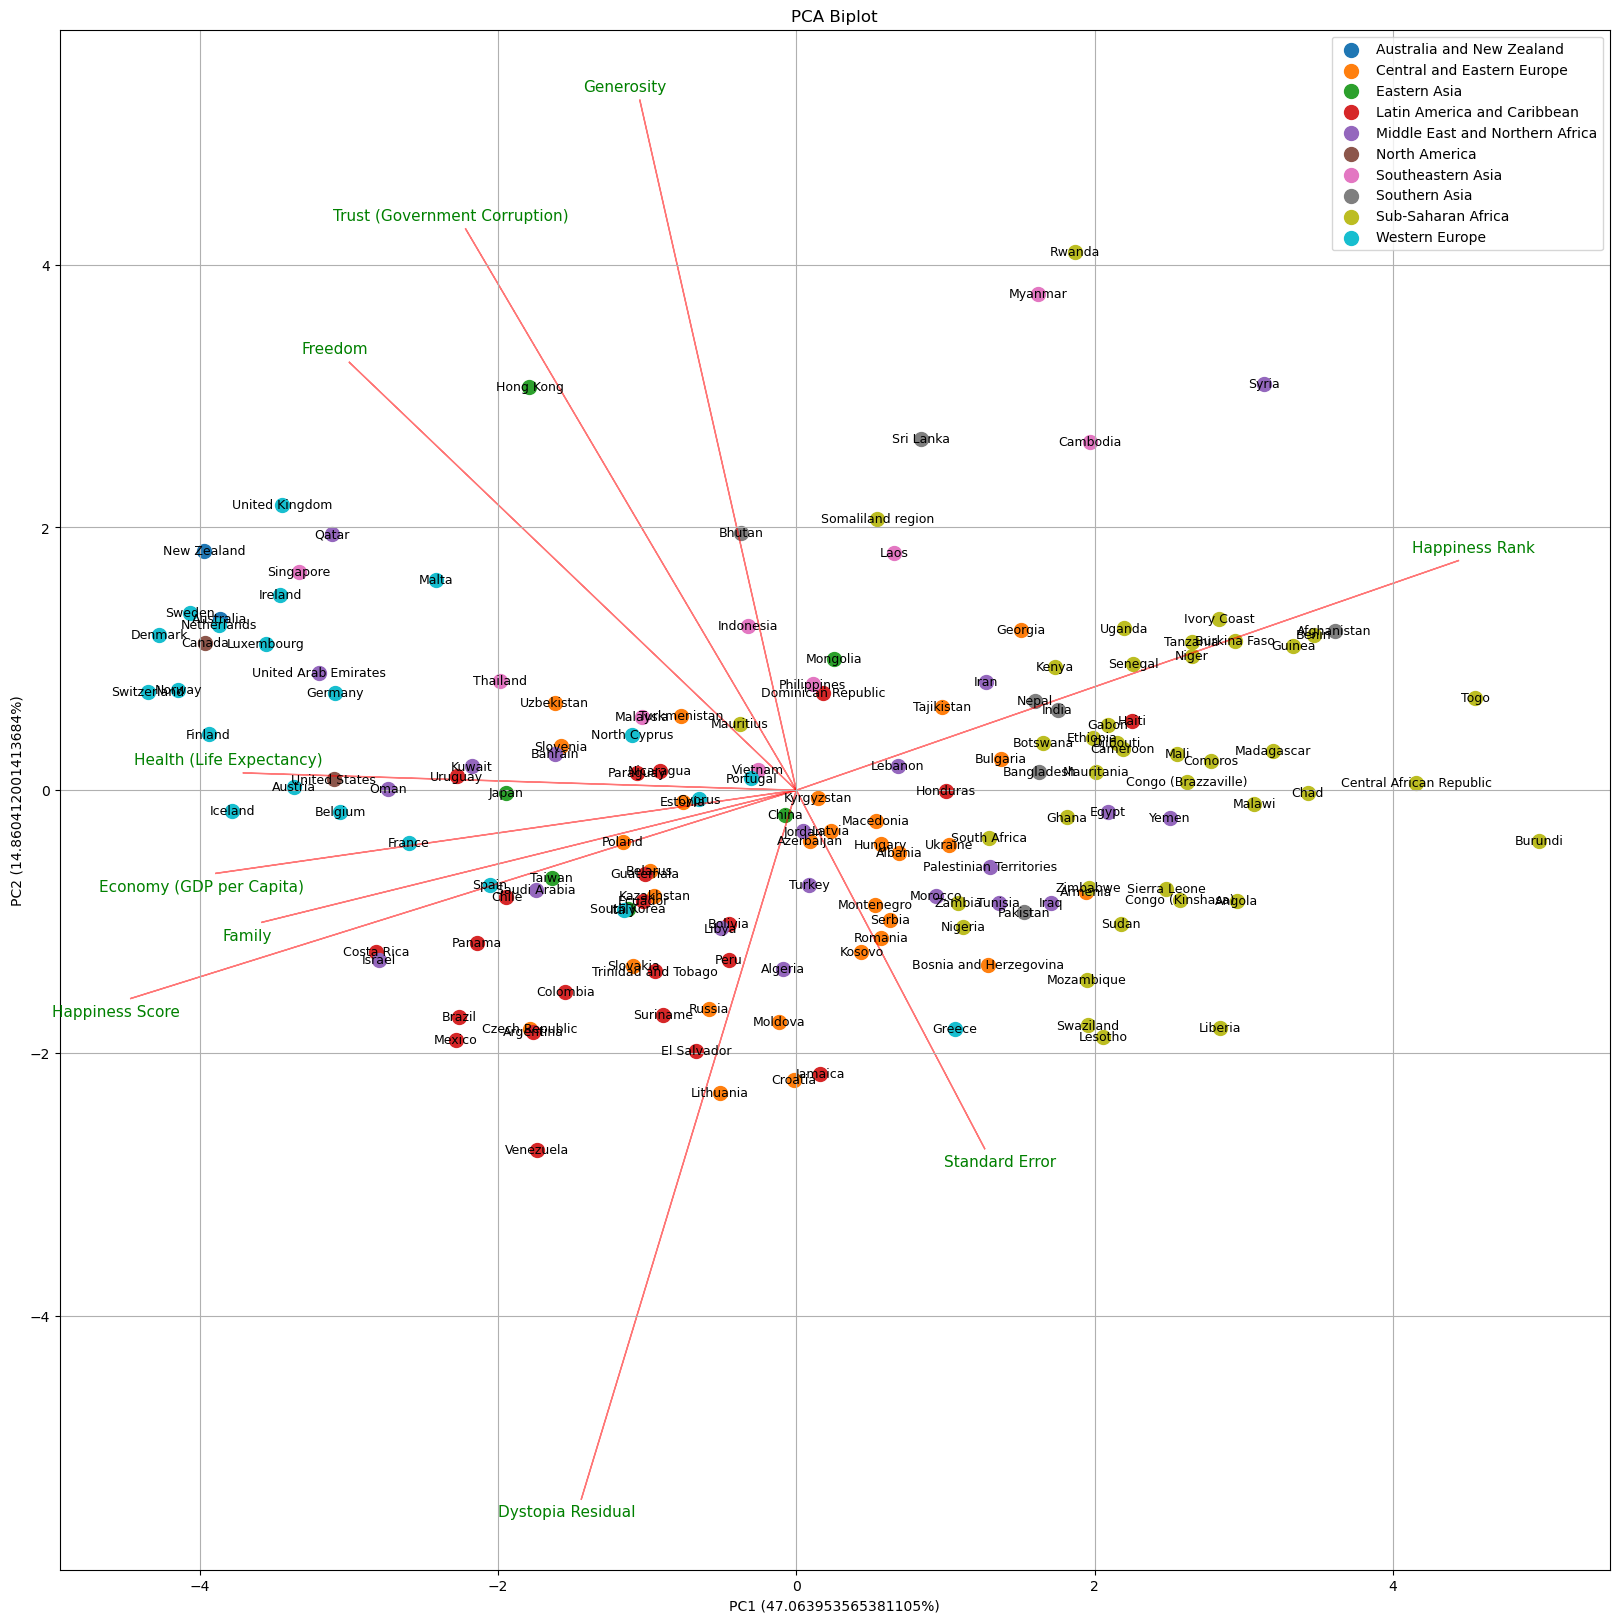

In [5]:
pca = PCA(n_components=2)
pca.fit(X)
feature_names = df.columns[2:]
X_pca = pca.transform(X)

# membuat scatterplot
fig, ax = plt.subplots(figsize=(20, 20))
regions = sorted(df['Region'].unique())
for region in regions:
    ax.scatter(X_pca[df['Region'] == region, 0], X_pca[df['Region'] == region, 1], label=region, alpha=1, s=100)

# membuat biplot yang menunjukkan proyeksi fitur ke 2 komponen utama teratas
features = np.arange(X.shape[1])
scaling_factor = 10
for i, feature in enumerate(features):
    arrow_end_x = scaling_factor*pca.components_[0, i]
    arrow_end_y = scaling_factor*pca.components_[1, i]
    ax.arrow(0, 0, arrow_end_x, arrow_end_y, color='r', alpha=0.5)
    offset_x = 0.1 if arrow_end_x > 0 else -0.1
    offset_y = 0.1 if arrow_end_y > 0 else -0.1
    ax.text(arrow_end_x+offset_x, arrow_end_y+offset_y, feature_names[feature], color='g', ha='center', va='center', fontsize=11)

# mencari persentase PC1 dan PC2 dan menambahkan ke label x dan y
variance_explained = pca.explained_variance_ratio_
ax.set_xlabel(f'PC1 ({variance_explained[0]*100}%)')
ax.set_ylabel(f'PC2 ({variance_explained[1]*100}%)')
ax.set_title('PCA Biplot')
ax.legend()

# menambahkan country label pada plot
for i, country in enumerate(df['Country']):
    x = X_pca[i, 0]
    y = X_pca[i, 1]
    ax.text(x, y, country, ha='center', va='center', fontsize=9)

ax.grid(True) # munculkan grid line
plt.show()

### Loading dan Score
Analisa loading dan score pada biplot tersebut. Bagaimana pola persebaran region yang berbeda. Dimanakah posisi indonesia relatif terhadap negara lain?

Dari hasil biplot diatas, didaptkan bahwa terdapat titik-titik dari region yang berbeda yang saling berdekatan, maka region tersebut dapat dikatakan memiliki pola persebaran yang tidak serupa. Posisi Indonesia terletak di dekat titik negara lain yang tidak pada region yang sama, maka Indonesia dapat dikatakan memiliki karakteristik yang berbeda dengan negara-negara tersebut. Lebih dari itu, dapat dilihat dari grafik biplot di atas bahwa Indonesia memiliki tingkat 'Generosity' dan 'Trust' yang rendah. 

# II.LDA

Gunakan metode Linear Discriminant Analysis (LDA) untuk menemukan representasi 2 dimensi utama dari seluruh data numerik (yang terstandardisasi)

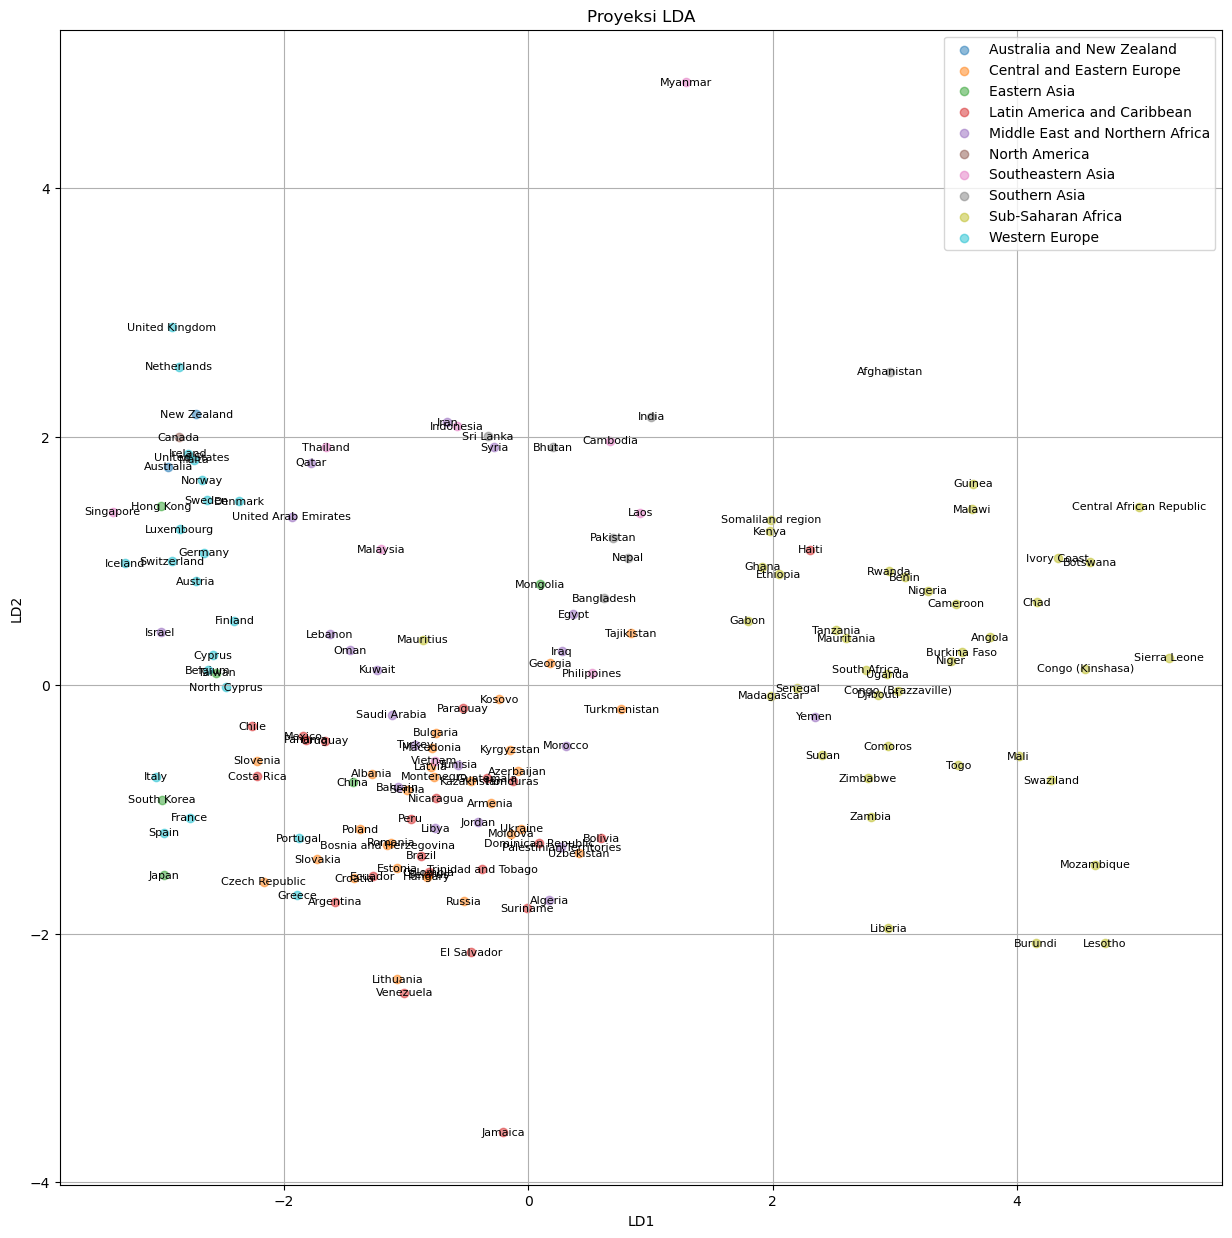

In [6]:
lda = LinearDiscriminantAnalysis(n_components = 2)
numerical_ix = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numerical_ix]
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_lda = lda.fit_transform(X_std, df['Region'])

fig, ax = plt.subplots(figsize=(15, 15))
regions = sorted(df['Region'].unique())
for i, region in enumerate(regions):
    ax.scatter(X_lda[df['Region'] == region, 0], X_lda[df['Region'] == region, 1], label=region, alpha=0.5)
    for j, (x, y) in enumerate(X_lda[df['Region'] == region]):
        ax.text(x, y, df.loc[df['Region'] == region].iloc[j]['Country'], ha='center', va='center', fontsize=8)

ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.set_title('Proyeksi LDA')
ax.legend()
ax.grid(True) # munculkan grid line
plt.show()

### Kesimpulan
Bandingkan hasil proyeksi LDA dengan hasil proyeksi PCA dari region yang berbeda

Dari kasus diatas, dapat disimpulkan bahwa LDA lebih cocok digunakan jika tujuannya adalah untuk membedakan kelompok-kelompok data atau region. Sedangkan PCA lebih cocok digunakan jika tujuannya adalah untuk mengekstraksi pola varian antar fitur yang terdapat dalam data. Hal ini dikarenakan LDA dapat memberikan proyeksi data ke dalam subspace yang lebih spesifik untuk membedakan kelompok-kelompok data atau region yang berbeda, sedangkan PCA memberikan proyeksi data ke dalam subspace yang mempertahankan pola varian antar fitur terbesar. Sehingga dalam konteks analisis region yang berbeda, LDA mungkin lebih cocok digunakan daripada PCA. Dari dua grafik di atas dapat terlihat bahwa proyeksi LDA lebih baik dalam melakukan pengelompokan data berdasarkan region.

### Kinerja Teman Kelompok

Cleve Giosia Adryana: 50%
<br>
Ribka Lolita: 50%
<br>
Emmanuel Christopher Aswan: 0%